In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

In [ ]:
d2 = pd.read_csv('Real estate.csv')
d2.head(10)

In [4]:
d2.shape

(414, 8)

In [5]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
tbd = ['X1 transaction date','No']
d2 = d2.drop(tbd, axis=1)
d2.head(3)

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3


In [7]:
d2.describe()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc75cf9ca10>,
      dtype=object)

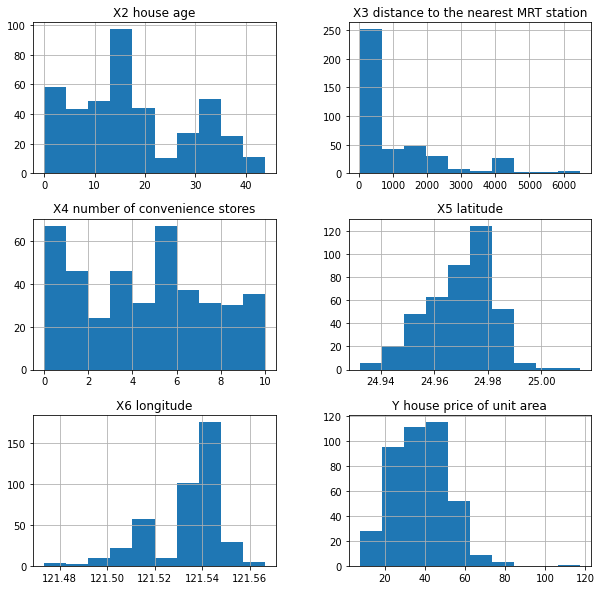

In [8]:
d2.hist(figsize=(10,10))

In [9]:
corr = d2.corr()
corr

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X2 house age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


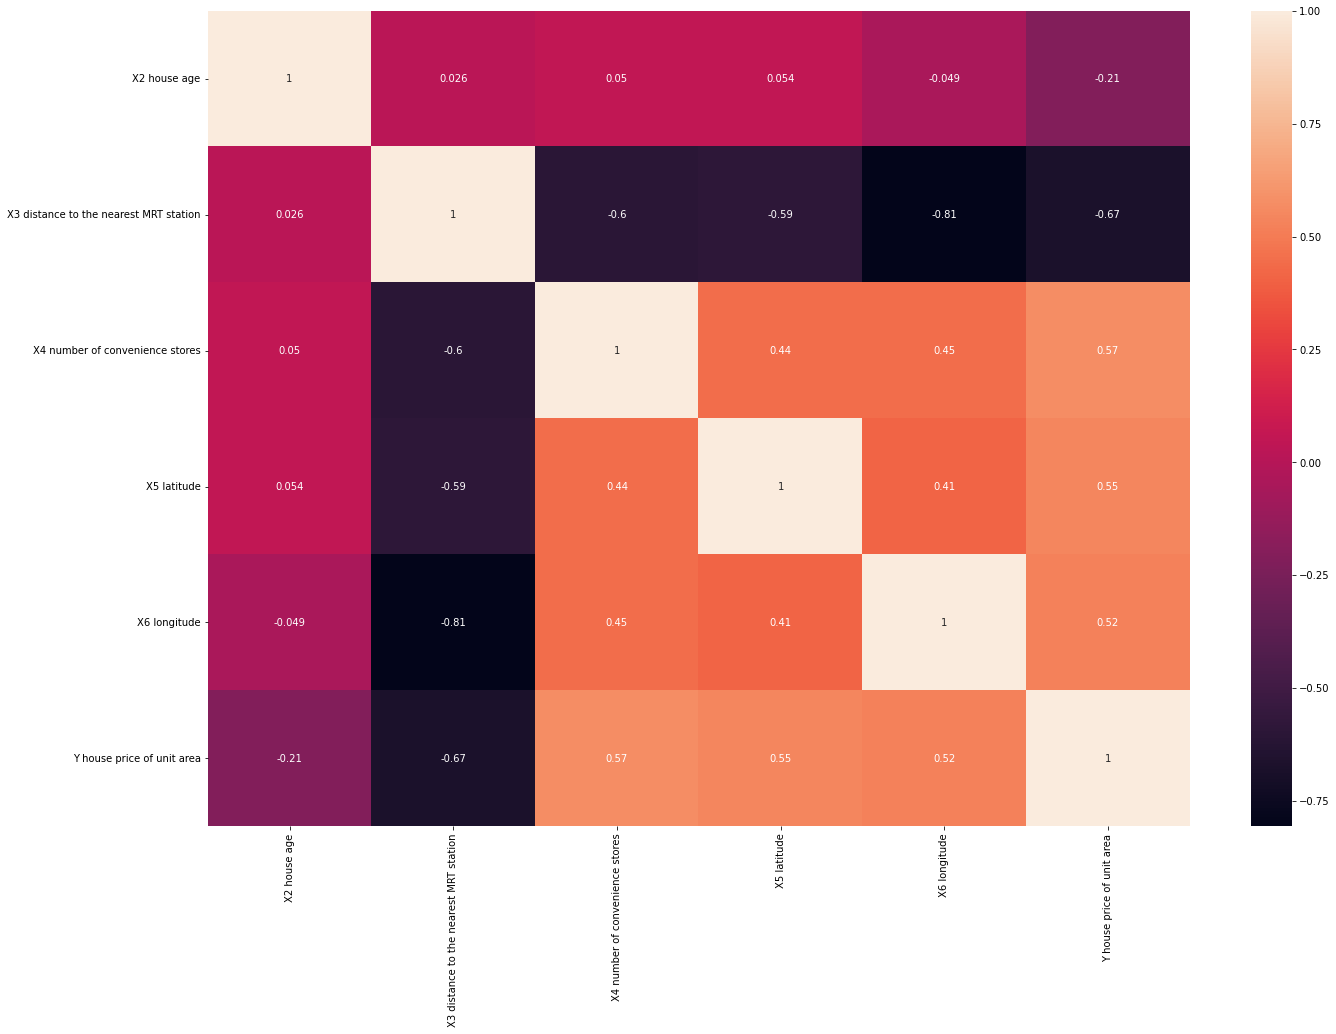

In [10]:
fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(corr, annot=True, ax=ax)

In [11]:
# Checking for null vlaues
d2.isnull().sum()

X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

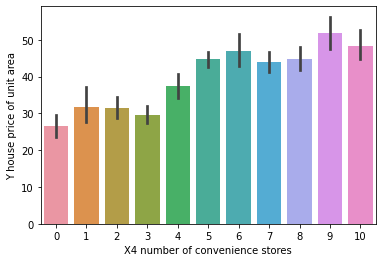

In [12]:
# Numerical attributes comparison using scatterplot
sns.barplot(x=d2['X4 number of convenience stores'], y=d2['Y house price of unit area']);

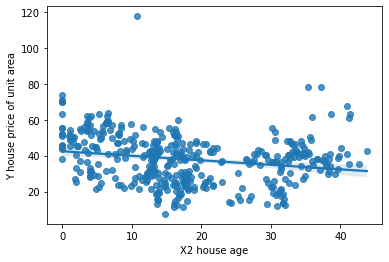

In [13]:
sns.regplot(x=d2['X2 house age'], y=d2['Y house price of unit area']);

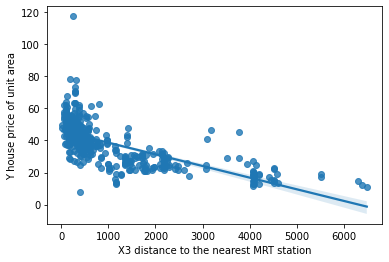

In [14]:
sns.regplot(x=d2['X3 distance to the nearest MRT station'], y=d2['Y house price of unit area']);

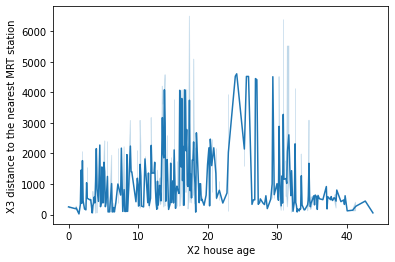

In [15]:
sns.lineplot(x=d2['X2 house age'], y=d2['X3 distance to the nearest MRT station']);

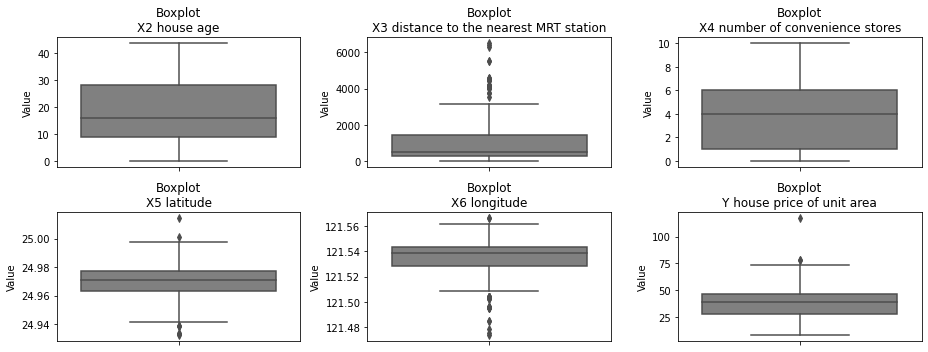

In [16]:
plt.figure(figsize=(13,5))

for feat, grd in zip(d2, range(231,237)):
    plt.subplot(grd)
    sns.boxplot(y=d2[feat], color='grey')
    plt.ylabel('Value')
    plt.title('Boxplot\n%s'%feat)
plt.tight_layout()

In [17]:
X2 = d2.loc[:,'X2 house age' : 'X6 longitude']
y2 = d2.loc[:,'Y house price of unit area']

In [18]:
#Train-test split
from sklearn.model_selection import train_test_split

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.2, random_state=1)
print(X_train_2.shape, X_test_2.shape)
print(y_train_2.shape, y_test_2.shape)

(331, 5) (83, 5)
(331,) (83,)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


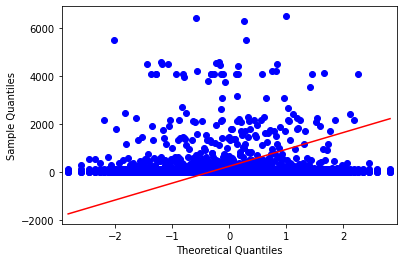

In [19]:
from statsmodels.graphics.gofplots import qqplot

qqplot(X2,line='s')
plt.show()

In [20]:
from scipy.stats import skew

print(skew(X2))

[ 0.38153742  1.88190636  0.15404583 -0.43700772 -1.21516823]


(331, 5)
(83, 5)


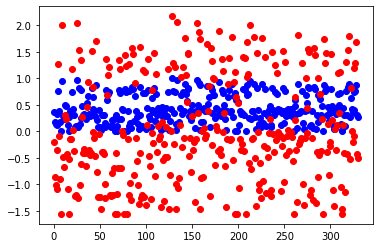

In [21]:
# Scaling Data using Min-Max Scaler

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm_2 = mms.fit_transform(X_train_2)
X_test_norm_2 = mms.transform(X_test_2)

# Scaling Data using Standard Scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_2)
X_train_std_2 = scaler.transform(X_train_2)
X_test_std_2 = scaler.transform(X_test_2)

# Comparing Scaled Data

xx = np.arange(len(X_train_std_2))
yy1 = X_train_norm_2[:,0]
yy2 = X_train_std_2[:,0]
plt.scatter(xx,yy1,color='b')
plt.scatter(xx,yy2,color='r')

print(X_train_std_2.shape)
print(X_test_std_2.shape)

In [22]:
import statsmodels.api as sm
model_ols = sm.OLS(y_train_2, X_train_norm_2)
fitted = model_ols.fit()
print(fitted.summary())

                                     OLS Regression Results                                    
Dep. Variable:     Y house price of unit area   R-squared (uncentered):                   0.940
Model:                                    OLS   Adj. R-squared (uncentered):              0.939
Method:                         Least Squares   F-statistic:                              1023.
Date:                        Tue, 07 Dec 2021   Prob (F-statistic):                   7.79e-197
Time:                                07:08:57   Log-Likelihood:                         -1233.8
No. Observations:                         331   AIC:                                      2478.
Df Residuals:                             326   BIC:                                      2497.
Df Model:                                   5                                                  
Covariance Type:                    nonrobust                                                  
                 coef    std err        

Distribution is not normal. Statistic: 0.882, p-value: 2.905e-15


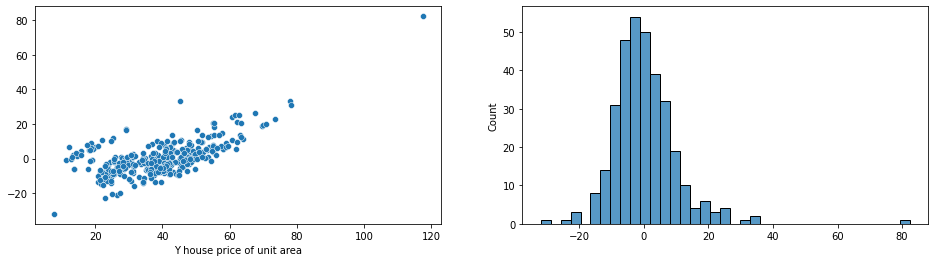

In [23]:
from scipy.stats import shapiro
fig, ax = plt.subplots(figsize=(16,4), ncols=2)
ax[0] = sns.scatterplot(x=y_train_2, y=fitted.resid, ax=ax[0])
ax[1] = sns.histplot(fitted.resid, ax=ax[1])

statistic, p_value = shapiro(fitted.resid)
if p_value>0.05:
    print("Distribution is normal. Statistic: {0:.3}, p-value: {1:.4}".format(statistic, p_value))
else:
    print("Distribution is not normal. Statistic: {0:.3}, p-value: {1:.4}".format(statistic, p_value))

In [24]:
from sklearn.neighbors import KNeighborsRegressor as knn
model4 = knn(n_neighbors=3,p=1,algorithm='brute')
model4.fit(X_train_norm_2,y_train_2)

KNeighborsRegressor(algorithm='brute', n_neighbors=3, p=1)

In [25]:
ypred3 = model4.predict(X_test_norm_2)
ypred3

array([25.5       , 47.56666667, 23.73333333, 15.26666667, 46.2       ,
       28.23333333, 25.5       , 35.03333333, 40.86666667, 20.        ,
       16.96666667, 36.4       , 22.3       , 51.43333333, 54.73333333,
       24.63333333, 46.2       , 49.43333333, 25.5       , 50.3       ,
       41.9       , 26.3       , 38.86666667, 65.4       , 49.06666667,
       26.86666667, 29.2       , 49.96666667, 52.23333333, 15.43333333,
       30.26666667, 44.6       , 44.46666667, 48.73333333, 35.4       ,
       16.13333333, 38.96666667, 34.63333333, 43.23333333, 15.26666667,
       40.66666667, 15.5       , 61.7       , 30.13333333, 30.2       ,
       27.13333333, 28.23333333, 44.46666667, 39.83333333, 35.13333333,
       16.13333333, 58.43333333, 44.4       , 16.13333333, 47.2       ,
       52.86666667, 46.2       , 38.16666667, 40.86666667, 40.7       ,
       15.5       , 31.7       , 25.46666667, 16.13333333, 36.        ,
       73.2       , 58.96666667, 35.4       , 16.13333333, 40.86

In [26]:
model4.score(X_test_norm_2,y_test_2)

0.6296329931099331

In [27]:
k_values = np.arange(1,100,2)

In [28]:
train_score_arr = []
val_score_arr = []

for k in k_values:
    
    model2 = knn(n_neighbors=k,p=1)
    model2.fit(X_train_norm_2,y_train_2)
    
    train_score = model2.score(X_train_norm_2, y_train_2) 
    train_score_arr.append(train_score*100)
    
    val_score = model2.score(X_test_norm_2, y_test_2)
    val_score_arr.append(val_score*100)
    
    print("k=%d, train_accuracy=%.2f%%, test_accuracy=%.2f%%" % (k, train_score * 100, val_score*100))

k=1, train_accuracy=98.33%, test_accuracy=49.44%
k=3, train_accuracy=82.85%, test_accuracy=62.60%
k=5, train_accuracy=76.69%, test_accuracy=65.12%
k=7, train_accuracy=71.81%, test_accuracy=62.22%
k=9, train_accuracy=69.53%, test_accuracy=69.05%
k=11, train_accuracy=67.94%, test_accuracy=69.58%
k=13, train_accuracy=66.26%, test_accuracy=69.62%
k=15, train_accuracy=65.38%, test_accuracy=69.72%
k=17, train_accuracy=65.23%, test_accuracy=70.52%
k=19, train_accuracy=64.86%, test_accuracy=71.22%
k=21, train_accuracy=63.86%, test_accuracy=71.21%
k=23, train_accuracy=63.58%, test_accuracy=71.37%
k=25, train_accuracy=63.23%, test_accuracy=71.86%
k=27, train_accuracy=62.84%, test_accuracy=72.35%
k=29, train_accuracy=62.49%, test_accuracy=72.00%
k=31, train_accuracy=62.12%, test_accuracy=72.91%
k=33, train_accuracy=61.52%, test_accuracy=72.89%
k=35, train_accuracy=60.88%, test_accuracy=72.61%
k=37, train_accuracy=60.06%, test_accuracy=72.44%
k=39, train_accuracy=59.33%, test_accuracy=72.41%
k=41,

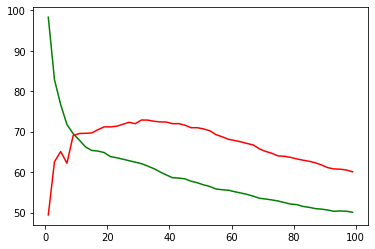

In [29]:
plt.plot(k_values,train_score_arr,'g')
plt.plot(k_values,val_score_arr,'r')

In [30]:
from sklearn.model_selection import cross_val_score
cross_val_score_train = cross_val_score(model4, X_train_norm_2, y_train_2, cv=10, scoring='r2')
print(cross_val_score_train)

[0.34096005 0.70102756 0.85978589 0.68715616 0.62325092 0.50928621
 0.67525036 0.93464588 0.69201748 0.51395829]


In [31]:
cross_val_score_train.mean()

0.6537338792092366

In [32]:
from sklearn.metrics import r2_score

print(r2_score(y_test_2, ypred3))

0.6296329931099331


In [33]:
c = pd.DataFrame(ypred3, columns=['Estimated Price'])
c.head()

,Estimated Price
0,25.500000
1,47.566667
2,23.733333
3,15.266667
4,46.200000


In [34]:
d = pd.DataFrame(y_test_2)
d = y_test_2.reset_index(drop=True)
d.head()

0    27.3
1    54.4
2    22.0
3    11.6
4    45.4
Name: Y house price of unit area, dtype: float64

In [35]:
ynew = pd.concat([c,d], axis=1)
ynew

,Estimated Price,Y house price of unit area
0,25.500000,27.3
1,47.566667,54.4
2,23.733333,22.0
3,15.266667,11.6
4,46.200000,45.4
...,...,...
78,31.700000,33.1
79,48.400000,59.6
80,44.933333,40.8
81,46.200000,52.2
